<a href="https://colab.research.google.com/github/troncosofranco/ML-Notebooks/blob/main/Scientific_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP

#Text mining
Text mining is the process of analyzing collections of textual materials in order to capture key concepts and themes and uncover hidden relationships and trends without requiring that you know the precise words or terms that authors have used to express those concepts. Although they are quite different, text mining is sometimes confused with information retrieval. While the accurate retrieval and storage of information is an enormous challenge, the extraction and management of quality content, terminology, and relationships contained within the information are crucial and critical processes. Text mining involves the following steps:

1. **Identify the text to be mined:** prepare the text for mining. If the text exists in multiple files, save the files to a single location. For databases, determine the field containing the text.
2. **Mine the text and extract structured data:** apply the text mining algorithms to the source text.
3. **Build concept and category models:** identify the key concepts and/or create categories. The number of concepts returned from the unstructured data is typically very large. Identify the best concepts and categories for scoring.
4. **Analyze the structured data**: employ traditional data mining techniques, such as clustering, classification, and predictive modeling, to discover relationships between the concepts. Merge the extracted concepts with other structured data to predict future behavior based on the concepts.


#1. Import modules

In [15]:
!pip install pymed
from pymed import PubMed
pubmed = PubMed()
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Load Data

In [17]:
# run query
query = "monoclonal antibody"
results = pubmed.query(query, max_results=100)


In [18]:
# retrieve all the available fields for each of the found articles
articleList = []
for article in results:
    articleDict = article.toDict()
    articleList.append(articleDict)

In [19]:
df = pd.DataFrame(articleList)
df.head()


,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml
0,36463281\n25534623\n22192725\n1546849\n3041608...,Safety and efficacy of tezepelumab vs. placebo...,Patients with severe uncontrolled asthma still...,[],Scientific reports,2022-12-04,"[{'lastname': 'Shaban Abdelgalil', 'firstname'...",None,None,None,© 2022. The Author(s).,10.1038/s41598-022-24763-9\n10.1186/1471-2458-...,"[[[], [<Element 'Year' at 0x7f8c82367b30>, <El..."
1,36463104\n26867935\n31068190\n30345906\n332789...,Pembrolizumab in combination with gemcitabine ...,We evaluated a new chemoimmunotherapy combinat...,"[Advanced breast cancer, Chemotherapy, HER2-ne...",BMC cancer,2022-12-04,"[{'lastname': 'de la Cruz-Merino', 'firstname'...",None,"Pembrolizumab 200 mg and gemcitabine 1,250 mg/m","Fourteen patients were treated with DL0, resul...",© 2022. The Author(s).,10.1186/s12885-022-10363-3\n10.1158/1078-0432....,"[[[], [<Element 'Year' at 0x7f8c822fb040>, <El..."
2,36462738,Novel trehalose-based excipients for stabilizi...,COVID-19 is caused by the infection of the lun...,"[Protein delivery, antibody formulation, lung ...",International journal of pharmaceutics,2022-12-04,"[{'lastname': 'Noverraz', 'firstname': 'Franço...",None,None,None,Copyright © 2022 The Author(s). Published by E...,10.1016/j.ijpharm.2022.122463,"[[[], [<Element 'Year' at 0x7f8c823207c0>, <El..."
3,36462104\n32544884\n32672061\n32075877\n331320...,Therapeutic Polypeptides and Peptidomimetics: ...,The coronavirus disease 2019 (COVID-19) pandem...,[],Clinical drug investigation,2022-12-04,"[{'lastname': 'Liu', 'firstname': 'Xinyu', 'in...",None,None,None,"© 2022. The Author(s), under exclusive licence...",10.1007/s40261-022-01231-w\n10.1016/S0140-6736...,"[[[], [<Element 'Year' at 0x7f8c8232a400>, <El..."
4,36462062\n35103762\n33626253\n34175021\n310428...,The emerging therapeutic landscape of relapsed...,"From a historic lens, treatment for patients w...","[Bispecific antibodies, CAR-T therapy, Monoclo...",Annals of hematology,2022-12-04,"[{'lastname': 'Tanenbaum', 'firstname': 'Benja...",None,None,None,"© 2022. The Author(s), under exclusive licence...",10.1007/s00277-022-05058-5\n10.1001/jama.2022....,"[[[], [<Element 'Year' at 0x7f8c822c7680>, <El..."


#3. Explore dataset

###Title and Abstract length distribution

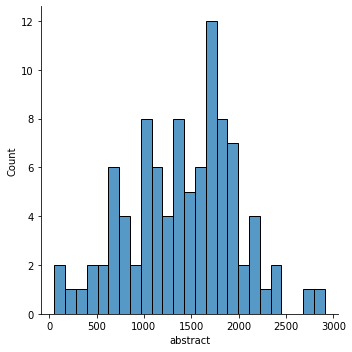

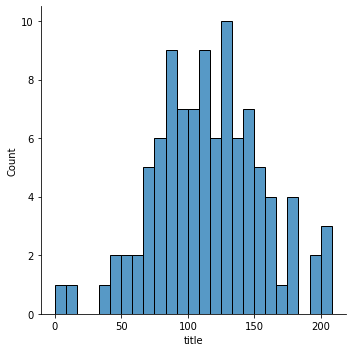

In [20]:
import seaborn as sns
sns.displot(df.abstract.str.len(), bins=25)
sns.displot(df.title.str.len(), bins=25)


The average length of most abstracts is around 1,700 characters, 
whereas titles are around 125. The titles may contain important keywords or identifiers for a given article, similar to that of the abstracts. Both columns are combined into a single column and analyze them together.

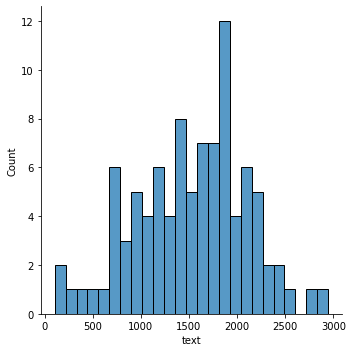

In [24]:
df["text"] = df["title"] + " " + df["abstract"]
#df[["title", "abstract", "text"]]
sns.displot(df.text.str.len(), bins=25)

The average length of most abstracts is around 1,600 characters.


### Stop words


In [25]:
df.text.str.split(expand=True).stack().value_counts()

of          785
and         752
the         714
in          476
to          386
           ... 
Fc-gamma      1
(FcɣRs)       1
mediate       1
passive       1
itself.       1
Length: 6205, dtype: int64

The text shows vast majority of stop words

### Clean stop words

In [28]:
from nltk.corpus import stopwords
import re
STOP_WORDS = stopwords.words()
def stop_words_cleaner(text):
    if type(text) == str:
        text = text.lower()
        text = re.sub("[^a-zA-Z]+", ' ', text)
        text_tokens = word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if 
not word in STOP_WORDS]
        filtered_sentence = (" ").join(tokens_without_sw)
        return filtered_sentence

In [29]:
stop_words_cleaner("Biotech in 2021 is a wonderful field to work and study in!")

'biotech wonderful field work study'

In [32]:
# apply function to datagrame
df['cleaned_text'] = df['text'].apply(lambda x: stop_words_cleaner(x))
df.cleaned_text.str.split(expand=True).stack().value_counts()

patients        166
antibody        105
monoclonal      100
treatment        92
disease          82
               ... 
bacillus          1
instillation      1
intravesical      1
mixed             1
aid               1
Length: 3417, dtype: int64

### Word cloud

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
# Drop nans
df2 = df[['cleaned_text']].dropna()
# Create word cloud
wordcloud = WordCloud(width = 5000, 
                      height = 3000, 
                      random_state=1, 
                      background_color='white', 
                      colormap='Blues', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(''.join(df2['cleaned_text']))


<Figure size 1080x576 with 0 Axes>

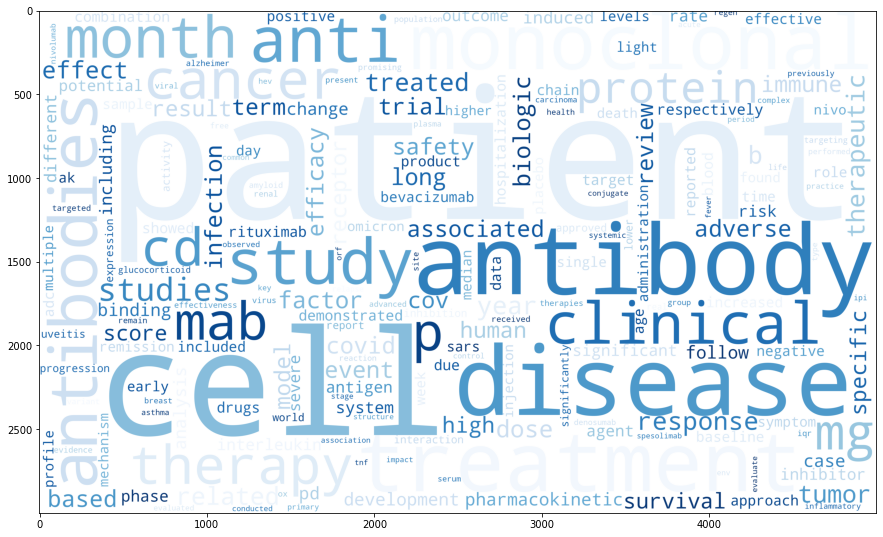

In [51]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)


#4. Scientific data search engine
Transformers are employed to design powerful semantic search engine to search for ideas or semantic meaning rather than only keywords. Transformes work using a mechanism known as self-attention, relating different portions of text within a sentence or embedding in an 
attempt to create a representation. 

Embeddings are low-dimensional numerical values or vectors of continuous numbers representing an item or sentence. In NLP, embeddings allow: 
• Reduce the dimensionality of large segments of text data.
• Compute the similarity between two different texts.
• Visualize relationships between portions of text.


In [52]:
import scipy
import torch
import pandas as pd
#!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util

Use pretained [SentenceTransformer](https://www.sbert.net/) model.

In [53]:
model = SentenceTransformer('msmarco-distilbert-base-v4')

In [108]:
import numpy as np
database = df["abstract"].values
np.asarray(database)
#database[34]= database[35]
#database[43]= database[44]
database[92]= database[91]
database[93]= database[92]
database[94]= database[92]
database[95] = database[96]

Encode text

In [110]:
database_embeddings = model.encode(database)


User's query and encode it as we did with the others

In [111]:
query = "One of the best discoveries were monoclonal antibodies"
query_embedding = model.encode(query)

Compute the distance between the items. Documents that were more similar to the user's query would have shorter distances, and those that were less similar would have longer ones.

In [113]:
import scipy
cos_scores = util.pytorch_cos_sim(query_embedding, database_embeddings)[0]

runSearch function that incorporates the query, the 
encoder, as well as a method to display the results. The process begins with a few print statements, and then encodes the new query into a variable called query_embedding. The distances are then calculated, and the results are sorted according to their distance.

In [114]:
def askQuestion(query, top_k):
    print(f"Query: {query}")
    query_embedding = model.encode(query, convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(query_embedding, database_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)
    
    for score, idx in zip(top_results[0], top_results[1]):
        print("Score: {:.4f}".format(score))
        print("Title: ", df.loc[float(idx)].title)
        print("Abstract: ", df.loc[float(idx)].abstract)

        


In [115]:
query = 'What is known about the removal of harmful cyanobacteria?

# Best of top 5 results
askQuestion(query, 5) 

Object `cyanobacteria` not found.
Query: One of the best discoveries were monoclonal antibodies
Score: 0.4528
Title:  Production and characterization of a murine anti-dal monoclonal antibody for blood typing in dogs.
Abstract:  Considering the strong immunogenicity of the Dal antigen, and that > 98% of dogs, including blood donors, are Dal-positive, finding compatible blood for a previously transfused Dal-negative patient may be challenging. This is exacerbated by limited access to typing reagents, which currently rely on polyclonal antibodies (PAb) produced following sensitization of dogs. Therefore, the objective of this study was to produce and characterize an anti-Dal murine monoclonal antibody (MAb). Conventional hybridoma technology was used to produce MAb directed against canine red blood cells (cRBC). Briefly, female BALB/c mice were immunized via repeated intraperitoneal injections of washed Dal-positive cRBC (DEA 1,3,7 negative; DEA 4,5 positive) until serologic titers were s

#5. Scientific research metrics

In [124]:
!pip install pyResearchInsights
from pyResearchInsights.common_functions import pre_processing
from pyResearchInsights.Scraper import scraper_main
from pyResearchInsights.Cleaner import cleaner_main
from pyResearchInsights.Analyzer import analyzer_main
from pyResearchInsights.NLP_Engine import nlp_engine_main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
'''Abstracts with these keywords will be retrieved from Springer'''
keywords_to_search = 'Cyanobacteria Method Harmful Removal Wastewater'

'''Declaring the number of topics to generated by the NLP_Engine'''
num_topics = 7

'''Declaring the number of keywords to be presented in the frequency/weight plots'''
num_keywords = 7

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[INFO]17:56:4 Writing 'European large perialpine lakes under anthropogenic pressures and climate change: present status, research gaps and future challenges' by  to analytical abstracts file
[INFO]17:56:4 Written 'European large perialpine lakes under anthropogenic pressures and climate change: present status, research gaps and future challenges' to disc
[INFO]17:56:4 Exiting the Abstract Crawler
[INFO]17:56:4 Delaying remote server ping: 18 seconds
[INFO]17:56:22 Delayed remote server ping: 18 seconds
[INFO]17:56:23 Souping page
[INFO]17:56:23 Souped page
[INFO]17:56:23 Scraping IDs
[INFO]17:56:23 Scraped IDs
[INFO]17:56:23 Entered the Abstract Crawler
[INFO]17:56:23 Extracting Abstract IDs from disc
[INFO]17:56:23 Extracted Abstract IDs from disc
[INFO]17:56:23 Abstract Number: 281
[INFO]17:56:23 Abstract ID: /article/10.1007/s12257-016-0584-8
[INFO]17:56:24 Souping page
[INFO]17:56:24 Souped page
[INFO]17:56:24 Scrap

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


[INFO]18:9:15 Preparing the frequency and weights vs keywords charts
[INFO]18:9:18 Prepared the frequency and weights vs keywords charts
[INFO]18:9:18 Exiting the visualizer_main() code


0

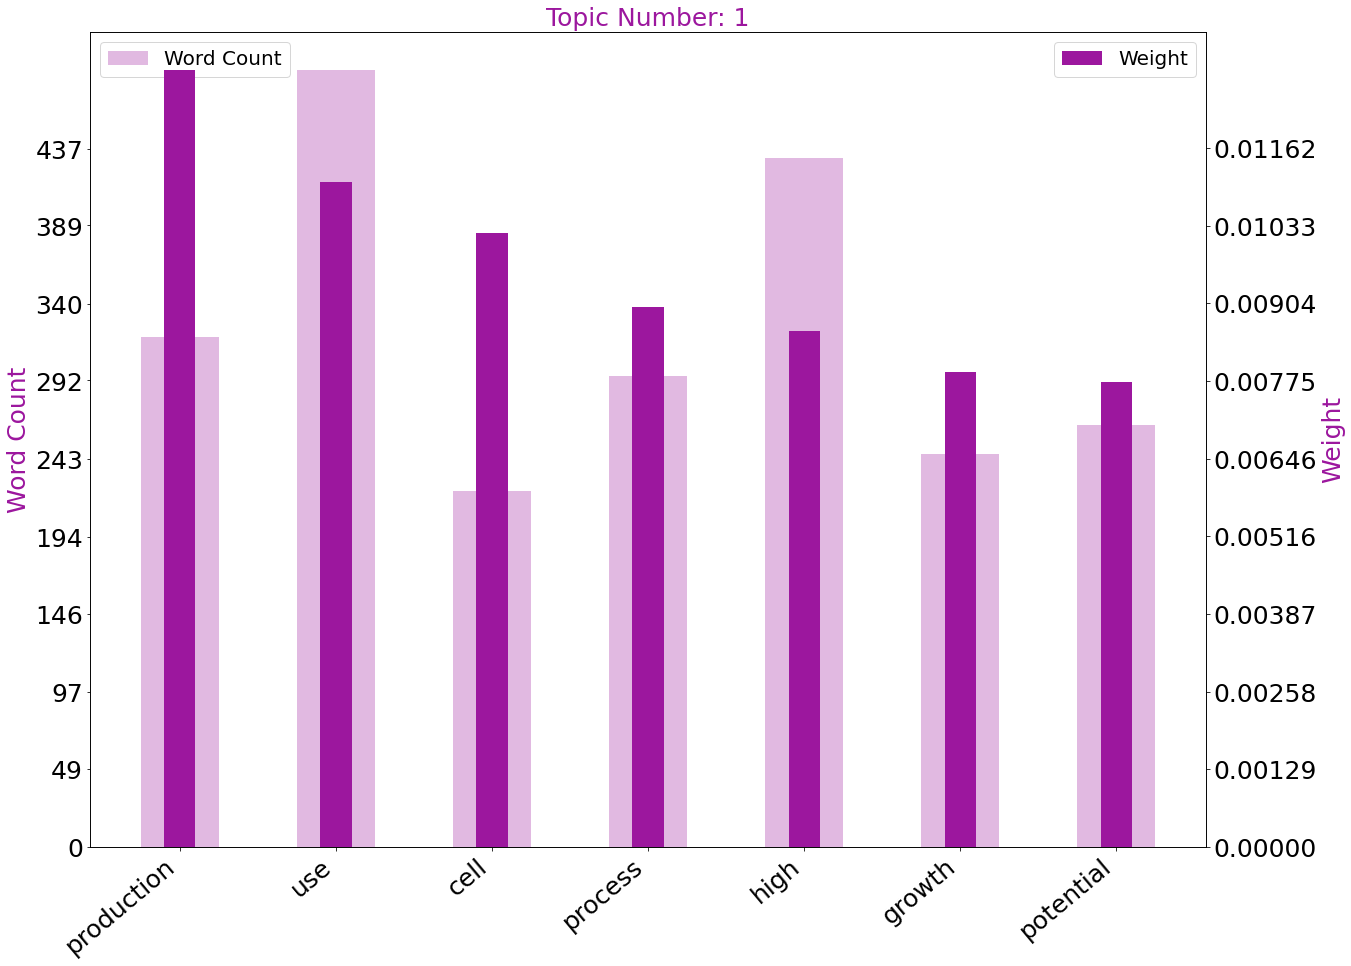

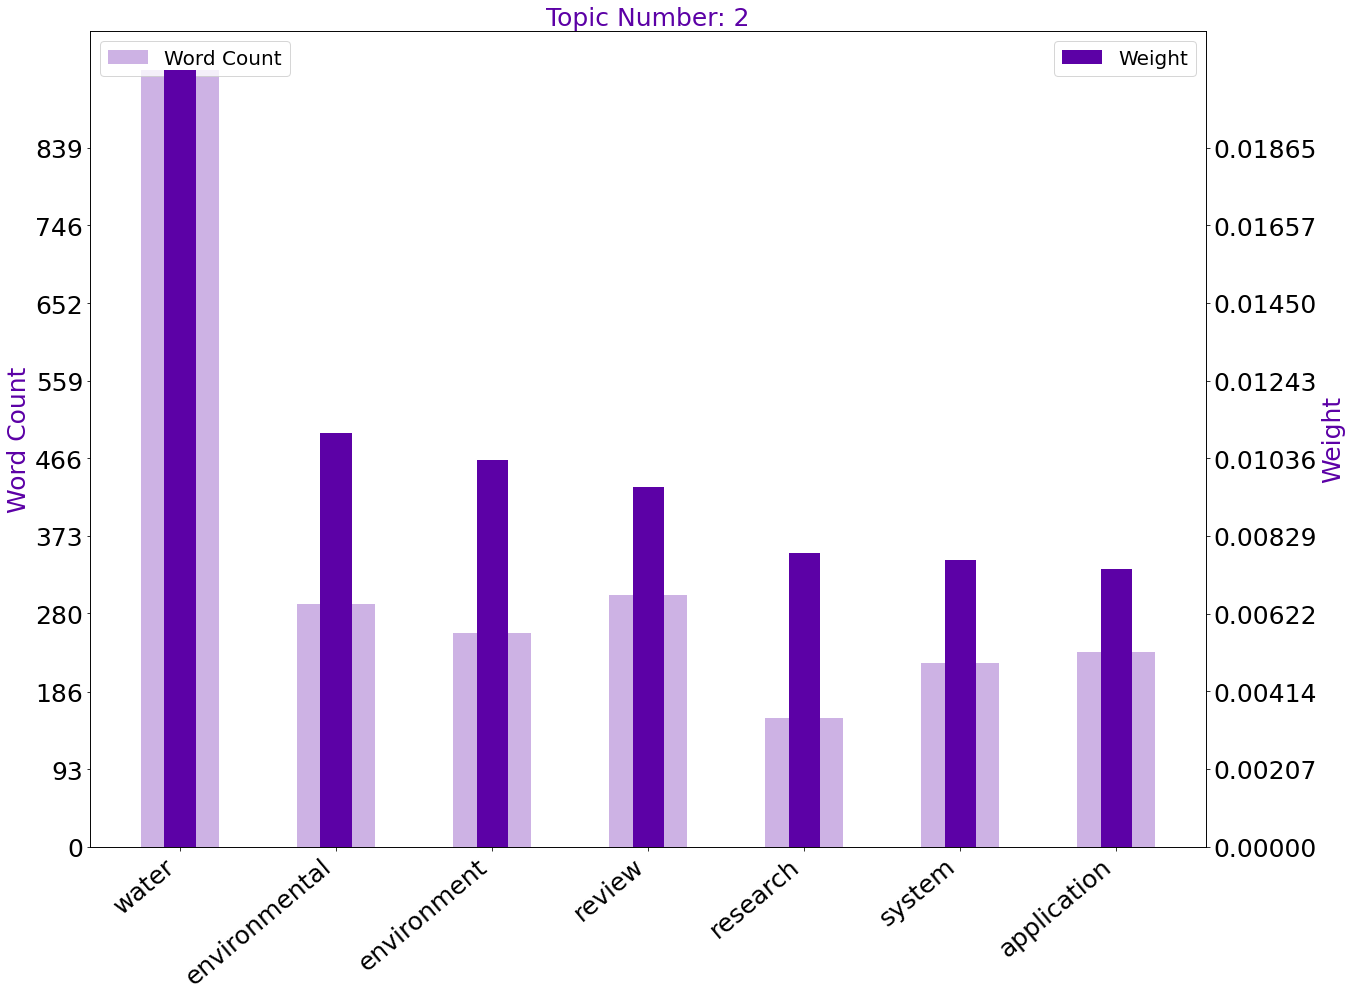

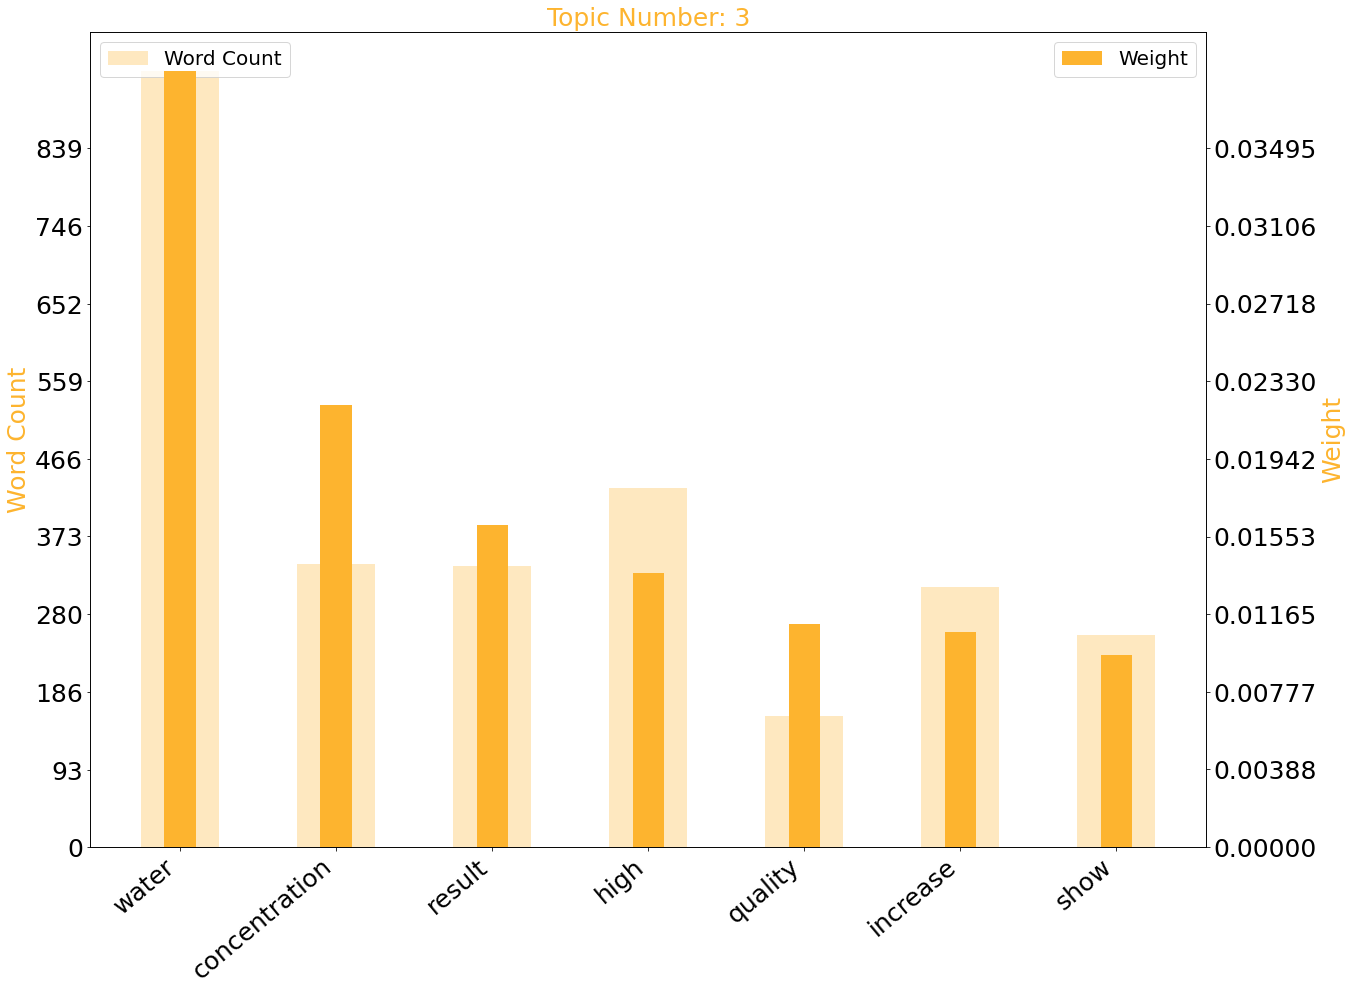

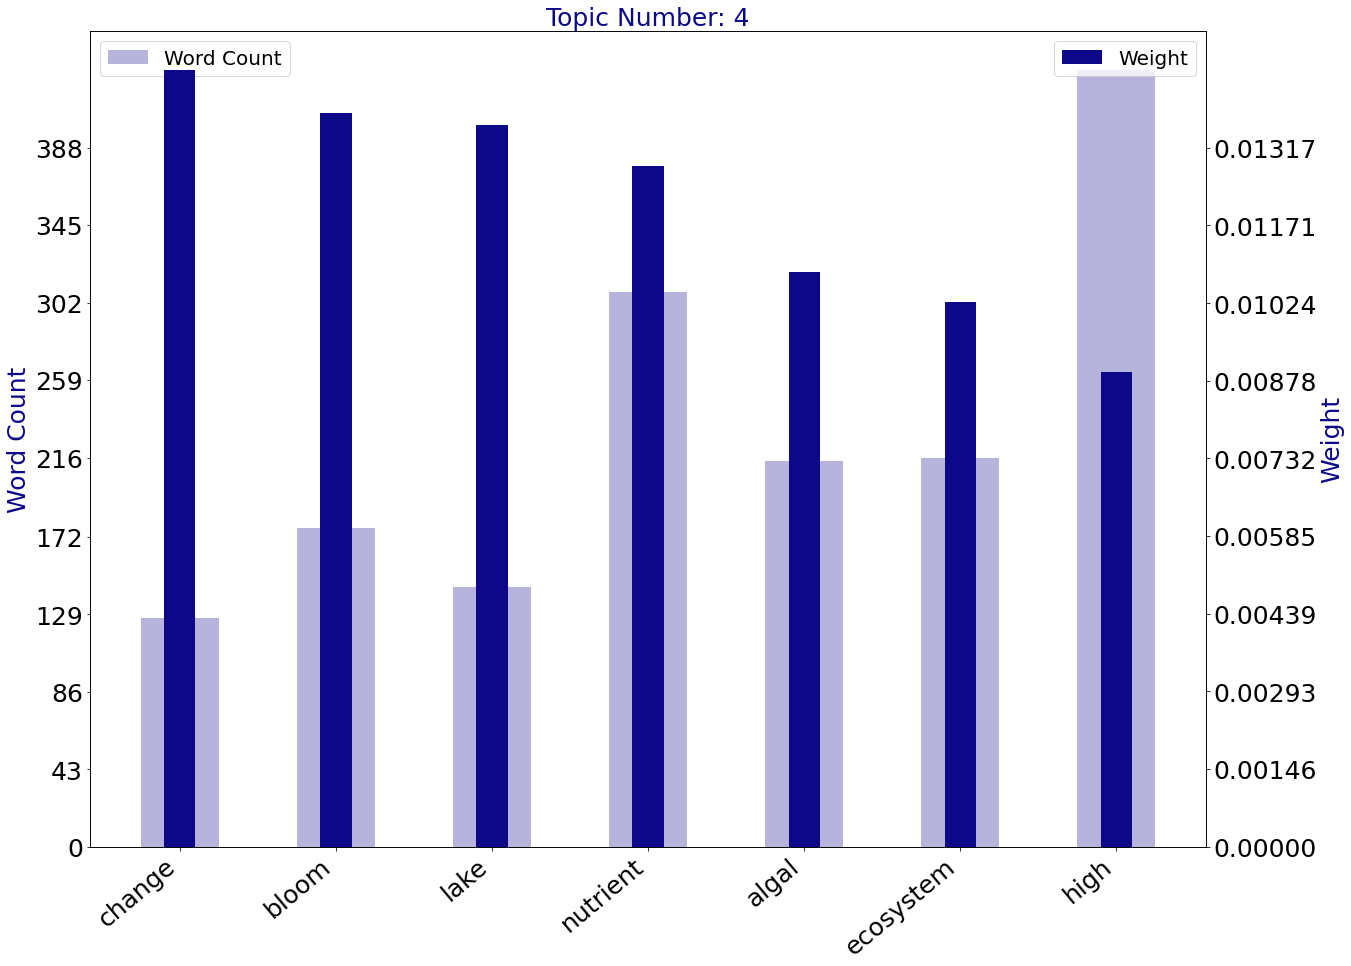

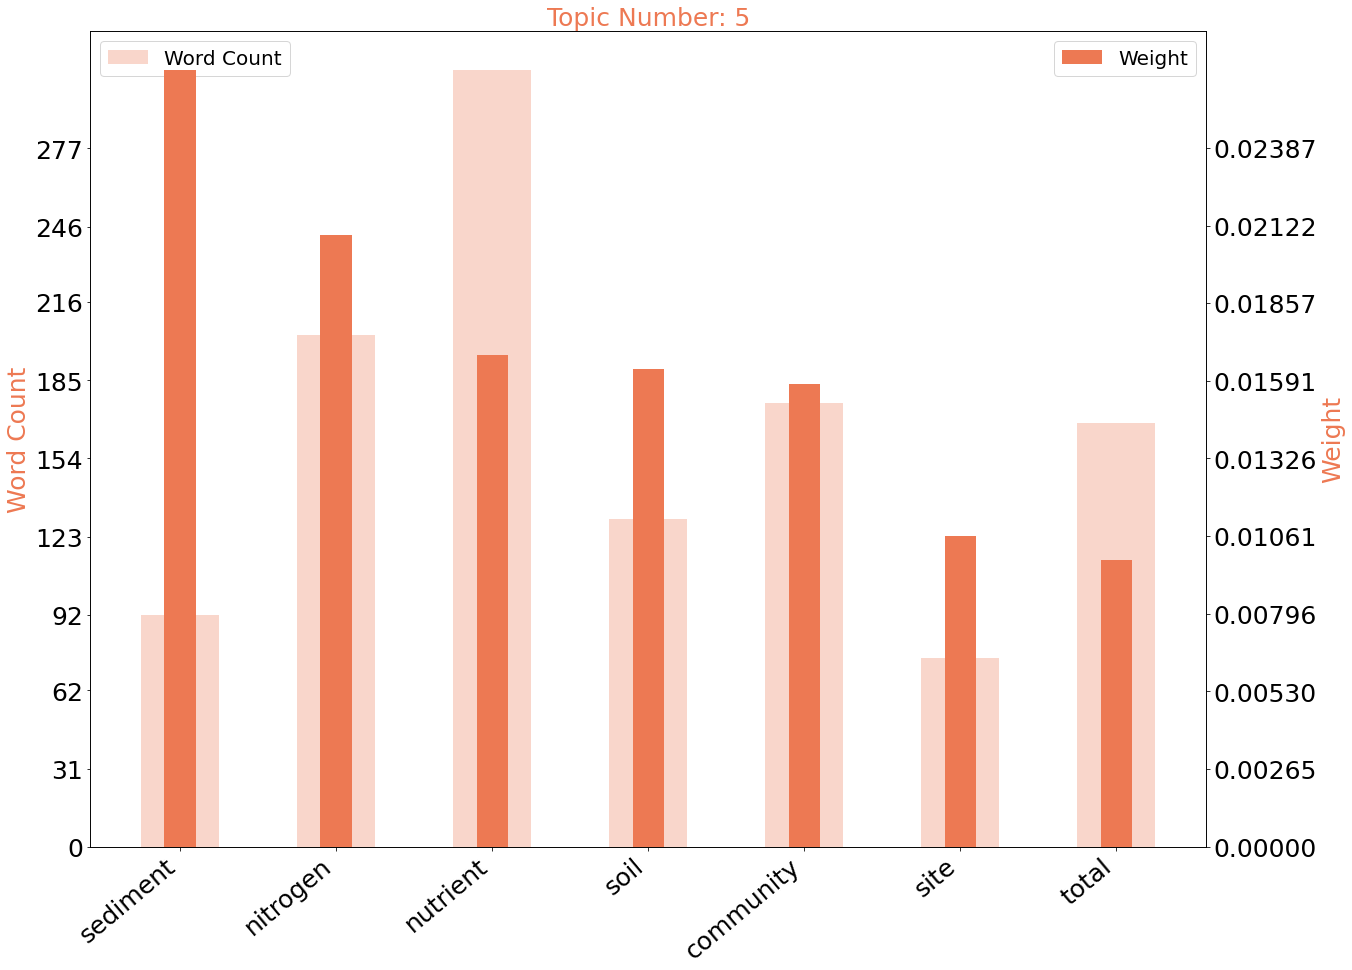

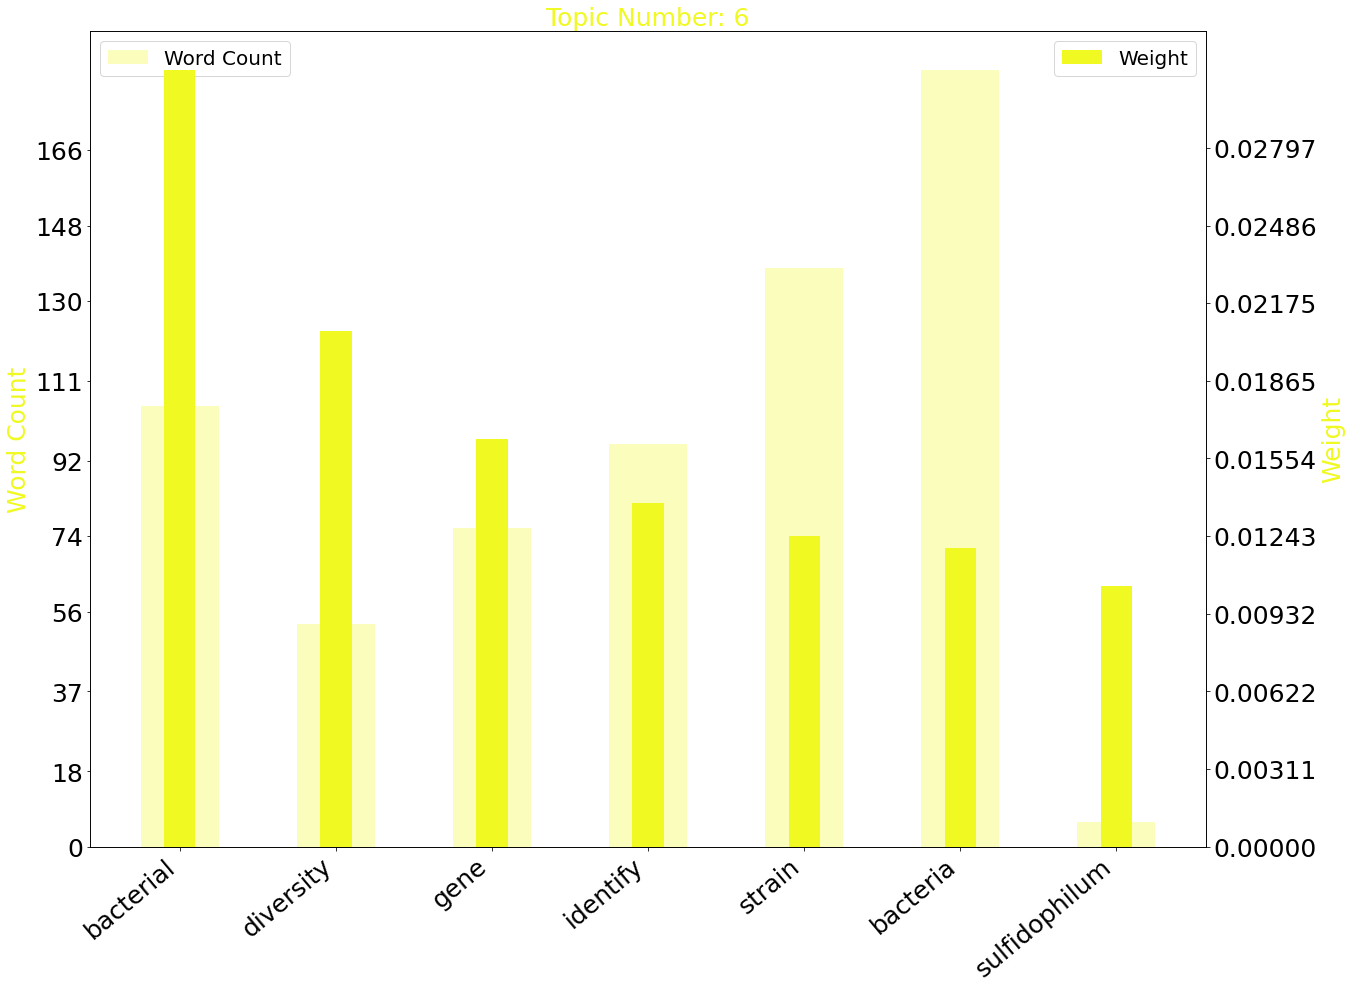

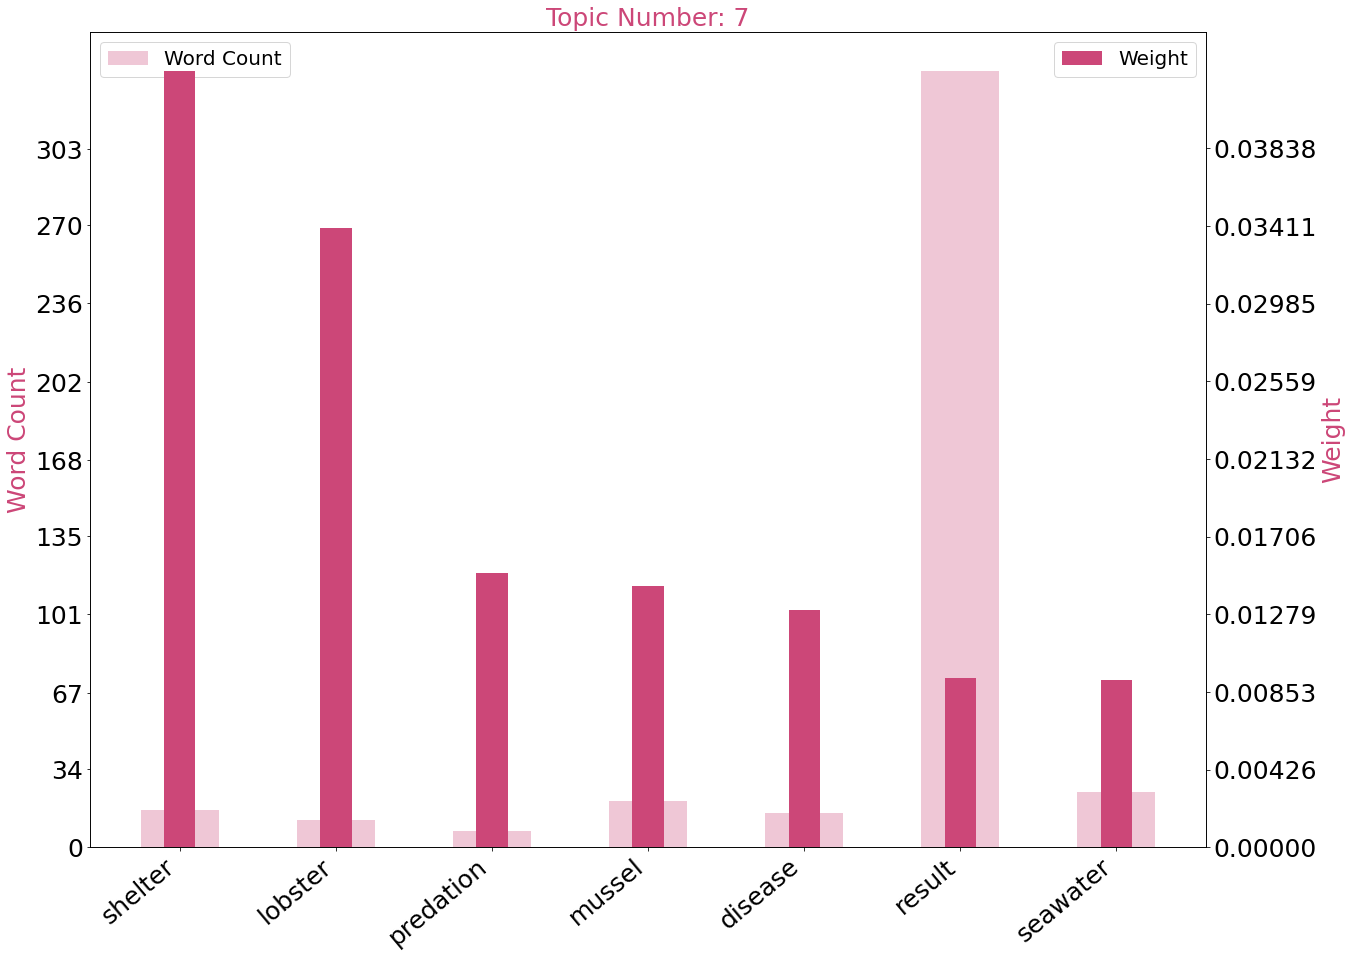

In [145]:
'''The pre_processing() function creates the log folder where the abstracts will be stored and the status_logger'''
abstracts_log_name, status_logger_name = pre_processing(keywords_to_search)

'''Here, we use scraper_main() to retrieve the abstracts'''
scraper_main(keywords_to_search, abstracts_log_name, status_logger_name)

'''Here, we use cleaner_main() to clean the abstracts collected'''
cleaner_main(abstracts_log_name, status_logger_name)

'''Here, we use analyzer_main() to tabulate the frequency of occurance of various words'''
analyzer_main(abstracts_log_name, status_logger_name)

'''Here, we use nlp_engine_main() to train the language model and present the topic modelling results'''
nlp_engine_main(abstracts_log_name, status_logger_name, num_topics, num_keywords)

Credits:
1. [Machine Learning in Biotechnology and Life Sciences](https://github.com/PacktPublishing/Machine-Learning-in-Biotechnology-and-Life-Sciences)
2. [NeuML](https://neuml.com/)